In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import matplotlib.pyplot as plt

base_dir = '/content/drive/MyDrive/app/DATASET/'
classes = ['dark spots', 'puffy eyes', 'wrinkles', 'clear skin']
class_counts = {}

for class_name in classes:
    class_path = os.path.join(base_dir, class_name)
    count = len(os.listdir(class_path))
    class_counts[class_name] = count
    print(f"Class '{class_name}': {count} images")

Class 'dark spots': 301 images
Class 'puffy eyes': 300 images
Class 'wrinkles': 300 images
Class 'clear skin': 300 images


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from google.colab import drive

In [5]:
data_dir = '/content/drive/MyDrive/app/DATASET/'
classes = ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']
IMG_SIZE = 224
RANDOM_STATE = 42

In [6]:
def load_images(data_dir, classes):
    """Loads images, resizes, and converts BGR to RGB."""
    data = []
    labels = []

    print("Starting image loading and resizing...")
    for idx, label in enumerate(classes):
        path = os.path.join(data_dir, label)
        if not os.path.exists(path):
            print(f"ERROR: Path not found: {path}")
            continue

        print(f"Processing class: {label}")
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

                data.append(img.astype('float32'))
                labels.append(idx)
            else: print(f"Warning: Could not read image {img_name}")

    return np.array(data), np.array(labels)



In [7]:
import cv2
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical

X, y = load_images(data_dir, classes)
X, y = shuffle(X, y, random_state=RANDOM_STATE)

y_encoded = to_categorical(y, num_classes=len(classes))

print(f"Images (X) shape: {X.shape} (Range [0, 255])")
print(f"Labels (y_encoded) shape: {y_encoded.shape} (One-Hot Encoded)")

Starting image loading and resizing...
Processing class: wrinkles
Processing class: dark spots
Processing class: puffy eyes
Processing class: clear skin
Images (X) shape: (1201, 224, 224, 3) (Range [0, 255])
Labels (y_encoded) shape: (1201, 4) (One-Hot Encoded)


/tmp/ipython-input-1476307135.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(x=label_names, palette="viridis")


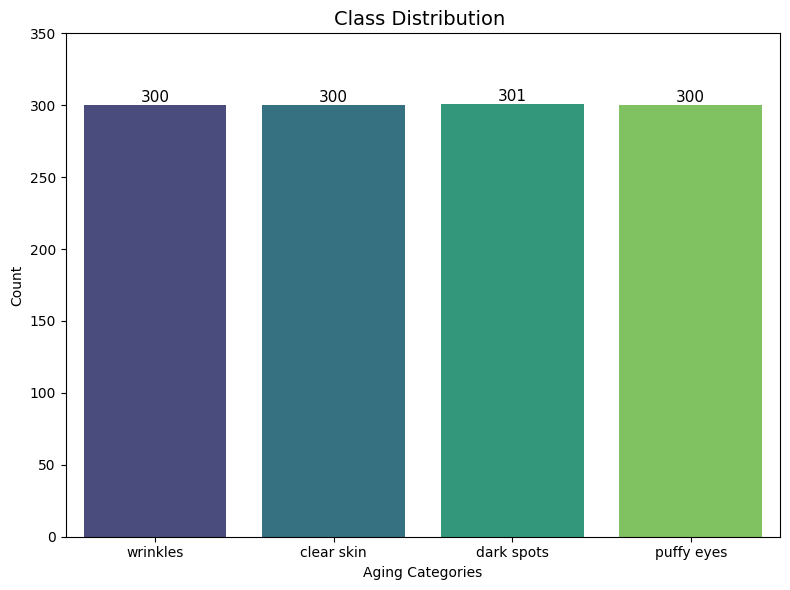

In [8]:
label_names = [classes[i] for i in y]

plt.figure(figsize=(8, 6))
bars = sns.countplot(x=label_names, palette="viridis")
plt.title("Class Distribution ", fontsize=14)
plt.xlabel("Aging Categories")
plt.ylabel("Count")
plt.ylim(0, 350)

for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='bottom', fontsize=11, color='black')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/app/class_distribution_plot.png')
plt.show()


 Augmentation
Displaying 5 augmented versions of a sample image:


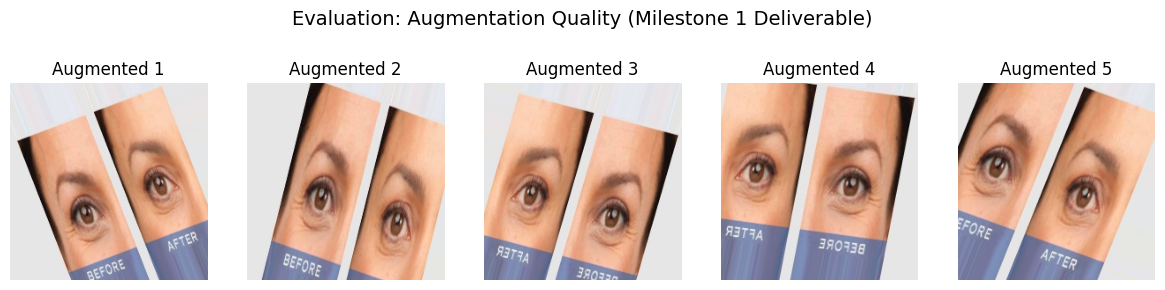

In [9]:
print("\n Augmentation")
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

sample_img = X[0].reshape((1,) + X[0].shape)
i = 0
plt.figure(figsize=(12, 3))
print("Displaying 5 augmented versions of a sample image:")

for batch in datagen.flow(sample_img, batch_size=1):
    plt.subplot(1, 5, i + 1)
    plt.imshow(batch[0] / 255.0)
    plt.title(f"Augmented {i+1}")
    plt.axis('off')
    i += 1
    if i >= 5:
        break

plt.suptitle("Evaluation: Augmentation Quality (Milestone 1 Deliverable)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('/content/drive/MyDrive/app/augmentation_visualization.png')
plt.show()

In [10]:
# Step 1: Import necessary libraries
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelBinarizer

# Step 2: Define your dataset path and image size
DATA_PATH = "/content/drive/MyDrive/app/DATASET/"
IMG_SIZE = (224, 224)  # image size (width, height)

# Step 3: Initialize lists for data and labels
X = []
y = []

# Step 4: Get class names (subfolders)
classes = os.listdir(DATA_PATH)
print("Detected classes:", classes)

# Step 5: Loop through each class folder
for class_name in classes:
    class_dir = os.path.join(DATA_PATH, class_name)
    if not os.path.isdir(class_dir):
        continue

    print(f"Processing class: {class_name}")
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        try:
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img)
            X.append(img_array)
            y.append(class_name)
        except Exception as e:
            print(f"Skipping {img_path}: {e}")

# Step 6: Convert lists to numpy arrays
X = np.array(X, dtype='float32') / 255.0
y = np.array(y)

print(f"Loaded {len(X)} images successfully.")

# Step 7: Encode labels using one-hot encoding
lb = LabelBinarizer()
y_encoded = lb.fit_transform(y)
print("Class mapping:", lb.classes_)

# Step 8: Save preprocessed arrays as .npy files
np.save("/content/drive/MyDrive/app/X_data_224_rgb.npy", X)
np.save("/content/drive/MyDrive/app/y_labels_one_hot.npy", y_encoded)

print("✅ Saved .npy files successfully in Google Drive!")

# Step 9: Optional — check shapes
print("X shape:", X.shape)
print("y shape:", y_encoded.shape)


Detected classes: ['dark spots', 'clear skin', 'puffy eyes', 'wrinkles']
Processing class: dark spots
Processing class: clear skin
Processing class: puffy eyes
Processing class: wrinkles
Loaded 1201 images successfully.
Class mapping: ['clear skin' 'dark spots' 'puffy eyes' 'wrinkles']
✅ Saved .npy files successfully in Google Drive!
X shape: (1201, 224, 224, 3)
y shape: (1201, 4)


In [11]:
X = np.load("/content/drive/MyDrive/app/X_data_224_rgb.npy")
y_encoded = np.load("/content/drive/MyDrive/app/y_labels_one_hot.npy")


Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading preprocessed dataset...
Data loaded. X shape: (1201, 224, 224, 3), y shape: (1201, 4)
Dataset Split | Train: (960, 224, 224, 3), Val: (241, 224, 224, 3)
Class Weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0)}
Model built. 75 base layers are now trainable.

--- Compiling Model for Single-Stage Training ---


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 224, 224,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,378,535 (16.70 MB)

 Trainable params: 3,484,704 (13.29 MB)

 Non-trainable params: 893,831 (3.41 MB)


--- Starting Single-Stage Fine-Tuning ---
Model built. 75 base layers are now trainable.

--- Compiling Model for Single-Stage Training ---


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 224, 224,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,378,535 (16.70 MB)

 Trainable params: 3,484,704 (13.29 MB)

 Non-trainable params: 893,831 (3.41 MB)


--- Starting Single-Stage Fine-Tuning ---


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.25417, saving model to /content/drive/MyDrive/app/final_efficientnet_model_v2.h5


60/60 - 140s - 2s/step - accuracy: 0.2458 - loss: 1.4898 - val_accuracy: 0.2542 - val_loss: 1.4385 - learning_rate: 2.0000e-05
Epoch 2/100

Epoch 2: val_accuracy did not improve from 0.25417
60/60 - 140s - 2s/step - accuracy: 0.3187 - loss: 1.4212 - val_accuracy: 0.2542 - val_loss: 1.4394 - learning_rate: 2.0000e-05
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.25417
60/60 - 142s - 2s/step - accuracy: 0.3177 - loss: 1.4322 - val_accuracy: 0.2542 - val_loss: 1.4417 - learning_rate: 2.0000e-05
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.25417
60/60 - 141s - 2s/step - accuracy: 0.3542 - loss: 1.3913 - val_accuracy: 0.2542 - val_loss: 1.4409 - learning_rate: 2.0000e-05
Epoch 5/100

Epoch 5: val_accuracy improved from 0.25417 to 0.36250, saving model to /content/drive/MyDrive/app/final_efficientnet_model_v2.h5


60/60 - 109s - 2s/step - accuracy: 0.3542 - loss: 1.3680 - val_accuracy: 0.3625 - val_loss: 1.4287 - learning_rate: 2.0000e-05
Epoch 6/100

Epoch 6: val_accuracy did not improve from 0.36250
60/60 - 109s - 2s/step - accuracy: 0.3625 - loss: 1.3522 - val_accuracy: 0.2500 - val_loss: 1.4453 - learning_rate: 2.0000e-05
Epoch 7/100

Epoch 7: val_accuracy did not improve from 0.36250
60/60 - 110s - 2s/step - accuracy: 0.3896 - loss: 1.3105 - val_accuracy: 0.2500 - val_loss: 1.4902 - learning_rate: 2.0000e-05
Epoch 8/100

Epoch 8: val_accuracy did not improve from 0.36250
60/60 - 142s - 2s/step - accuracy: 0.3906 - loss: 1.3272 - val_accuracy: 0.2500 - val_loss: 1.4849 - learning_rate: 2.0000e-05
Epoch 9/100

Epoch 9: val_accuracy did not improve from 0.36250
60/60 - 139s - 2s/step - accuracy: 0.3896 - loss: 1.3112 - val_accuracy: 0.3042 - val_loss: 1.4641 - learning_rate: 2.0000e-05
Epoch 10/100

Epoch 10: val_accuracy did not improve from 0.36250

Epoch 10: ReduceLROnPlateau reducing learn

60/60 - 205s - 3s/step - accuracy: 0.4031 - loss: 1.2950 - val_accuracy: 0.4042 - val_loss: 1.3078 - learning_rate: 4.0000e-06
Epoch 14/100

Epoch 14: val_accuracy did not improve from 0.40417
60/60 - 139s - 2s/step - accuracy: 0.4240 - loss: 1.2938 - val_accuracy: 0.3958 - val_loss: 1.3179 - learning_rate: 4.0000e-06
Epoch 15/100

Epoch 15: val_accuracy did not improve from 0.40417
60/60 - 105s - 2s/step - accuracy: 0.4552 - loss: 1.2587 - val_accuracy: 0.3458 - val_loss: 1.3432 - learning_rate: 4.0000e-06
Epoch 16/100

Epoch 16: val_accuracy improved from 0.40417 to 0.42083, saving model to /content/drive/MyDrive/app/final_efficientnet_model_v2.h5


60/60 - 144s - 2s/step - accuracy: 0.3948 - loss: 1.2828 - val_accuracy: 0.4208 - val_loss: 1.2918 - learning_rate: 4.0000e-06
Epoch 17/100

Epoch 17: val_accuracy did not improve from 0.42083
60/60 - 107s - 2s/step - accuracy: 0.3979 - loss: 1.2920 - val_accuracy: 0.4125 - val_loss: 1.3070 - learning_rate: 4.0000e-06
Epoch 18/100

Epoch 18: val_accuracy did not improve from 0.42083
60/60 - 202s - 3s/step - accuracy: 0.4167 - loss: 1.2650 - val_accuracy: 0.4208 - val_loss: 1.3142 - learning_rate: 4.0000e-06
Epoch 19/100

Epoch 19: val_accuracy did not improve from 0.42083
60/60 - 142s - 2s/step - accuracy: 0.4031 - loss: 1.2557 - val_accuracy: 0.4167 - val_loss: 1.3192 - learning_rate: 4.0000e-06
Epoch 20/100

Epoch 20: val_accuracy did not improve from 0.42083
60/60 - 141s - 2s/step - accuracy: 0.4219 - loss: 1.2700 - val_accuracy: 0.4042 - val_loss: 1.3182 - learning_rate: 4.0000e-06
Epoch 21/100

Epoch 21: val_accuracy did not improve from 0.42083

Epoch 21: ReduceLROnPlateau reduci

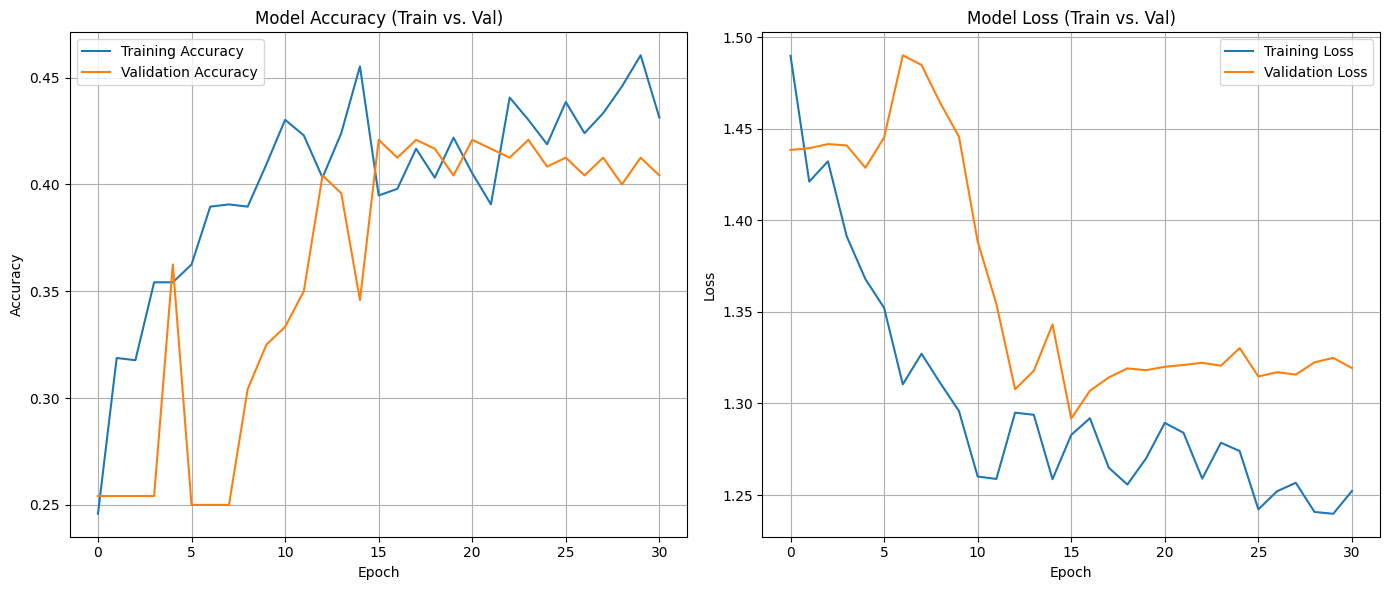

Loading best fine-tuned model for final evaluation...

Generating classification report and confusion matrix...
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step
Classification Report:
              precision    recall  f1-score   support

    wrinkles       0.50      0.88      0.64        60
  dark spots       0.00      0.00      0.00        61
  puffy eyes       0.34      0.23      0.28        60
  clear skin       0.37      0.58      0.45        60

    accuracy                           0.42       241
   macro avg       0.30      0.43      0.34       241
weighted avg       0.30      0.42      0.34       241



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


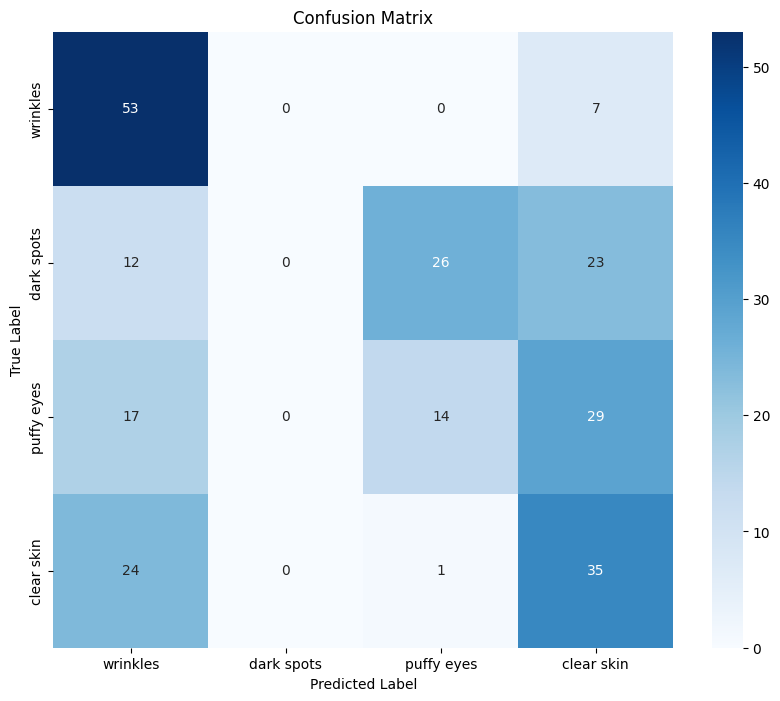


--- Model Training and Evaluation Complete ---


In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# --- Configuration ---
DRIVE_PATH = '/content/drive'
DATA_PATH = os.path.join(DRIVE_PATH, 'MyDrive/app/')
# Model will be saved as final_efficientnet_model_v2.h5
MODEL_PATH = os.path.join(DATA_PATH, 'final_efficientnet_model_v2.h5')
CLASSES = ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']
NUM_CLASSES = len(CLASSES)
IMG_SIZE = 224
RANDOM_STATE = 42
LEARNING_RATE = 2e-5
BATCH_SIZE = 16
EPOCHS = 100 # Max epochs (will be stopped early)

# --- Mount Drive ---
print("Mounting Google Drive...")
drive.mount(DRIVE_PATH)

# --- Load Preprocessed Data ---
print("Loading preprocessed dataset...")
try:
    X = np.load(os.path.join(DATA_PATH, 'X_data_224_rgb.npy'))
    y_encoded = np.load(os.path.join(DATA_PATH, 'y_labels_one_hot.npy'))
except FileNotFoundError:
    raise FileNotFoundError("Data files not found. Run the PREPROCESSING script first.")

X = X.astype('float32')
print(f"Data loaded. X shape: {X.shape}, y shape: {y_encoded.shape}")

# --- Split Data ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=RANDOM_STATE, stratify=y_encoded
)
print(f"Dataset Split | Train: {X_train.shape}, Val: {X_val.shape}")
y_train_labels = np.argmax(y_train, axis=1)
class_weights_val = compute_class_weight(
    'balanced', classes=np.arange(NUM_CLASSES), y=y_train_labels
)
class_weights = dict(enumerate(class_weights_val))
print(f"Class Weights: {class_weights}")

# --- Data Augmentation Generators ---
datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.08,
    height_shift_range=0.08,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = datagen_train.flow(X_train, y_train, batch_size=BATCH_SIZE)

# 2. Validation Generator (NO augmentation)
datagen_val = ImageDataGenerator()
val_generator = datagen_val.flow(X_val, y_val, batch_size=BATCH_SIZE, shuffle=False)
def build_model(input_shape=(224, 224, 3), num_classes=4):
    """Builds the EfficientNetB0 model with fine-tuning unfreeze built-in."""
    preprocess_input = tf.keras.applications.efficientnet.preprocess_input

    inputs = Input(shape=input_shape)
    x = preprocess_input(inputs)

    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=x)

    # Set trainable=True from the start
    base_model.trainable = True

    # Re-freeze all but the top 75 layers
    FINE_TUNE_AT = -75
    for layer in base_model.layers[:FINE_TUNE_AT]:
        layer.trainable = False

    # Add the classifier head
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.4)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.25)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model, FINE_TUNE_AT

model, FINE_TUNE_AT = build_model()
print(f"Model built. {abs(FINE_TUNE_AT)} base layers are now trainable.")

# --- Compile Model ---
print("\n--- Compiling Model for Single-Stage Training ---")
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# --- Define Callbacks ---
callbacks = [
    # More patient EarlyStopping
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    # Saves the best model to our target file
    ModelCheckpoint(MODEL_PATH, monitor='val_accuracy', save_best_only=True, verbose=1),
    # ReduceLROnPlateau to automatically manage the LR
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
]

steps_per_epoch = len(X_train) // BATCH_SIZE
validation_steps = len(X_val) // BATCH_SIZE

# --- Start Training (Single Stage) ---
print("\n--- Starting Single-Stage Fine-Tuning ---")
print(f"Model built. {abs(FINE_TUNE_AT)} base layers are now trainable.")

# --- Compile Model ---
print("\n--- Compiling Model for Single-Stage Training ---")
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# --- Define Callbacks ---
callbacks = [
    # More patient EarlyStopping
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    # Saves the best model to our target file
    ModelCheckpoint(MODEL_PATH, monitor='val_accuracy', save_best_only=True, verbose=1),
    # ReduceLROnPlateau to automatically manage the LR
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
]

steps_per_epoch = len(X_train) // BATCH_SIZE
validation_steps = len(X_val) // BATCH_SIZE

# --- Start Training (Single Stage) ---
print("\n--- Starting Single-Stage Fine-Tuning ---")
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=EPOCHS, # Train for max 100 epochs
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=2
)

print(f"\nTraining Complete. Final model saved to: {MODEL_PATH}")
def plot_history(history):
    """Plots the history from the training run."""
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(14, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Model Accuracy (Train vs. Val)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Model Loss (Train vs. Val)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # Plot will be saved as training_curves_v2.png
    plt.savefig(os.path.join(DATA_PATH, 'training_curves_v2.png'))
    plt.show()

print("\nGenerating training history plots...")
plot_history(history) # Pass the single history object

# --- 2. Confusion Matrix and Classification Report ---
def plot_confusion_matrix(model, x_val, y_val_one_hot, class_names):
    """Plots the confusion matrix and prints a classification report."""
    print("\nGenerating classification report and confusion matrix...")

    y_pred = model.predict(x_val)

    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val_one_hot, axis=1)

    print("Classification Report:")
    print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

    # Compute Confusion Matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    # Plot will be saved as confusion_matrix_v2.png
    plt.savefig(os.path.join(DATA_PATH, 'confusion_matrix_v2.png'))
    plt.show()

# Load the best *final* model to be sure
print("Loading best fine-tuned model for final evaluation...")
model.load_weights(MODEL_PATH)
plot_confusion_matrix(model, X_val, y_val, CLASSES)

print("\n--- Model Training and Evaluation Complete ---")

Mounting Google Drive...
Drive already mounted.
Loading model from: /content/drive/MyDrive/app/final_efficientnet_model_v2.h5


Model loaded successfully.

--- Image Prediction ---
Please upload an image file (jpg, png, etc.)


Saving download (2).jpeg to download (2) (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

--- Prediction Result ---


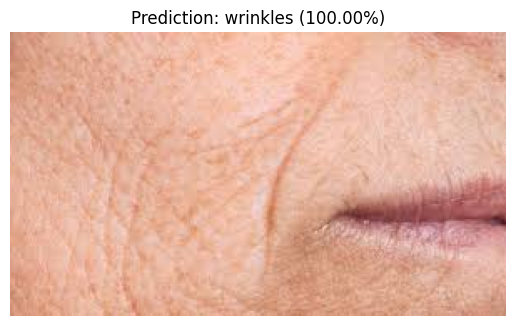


Predicted Class: wrinkles
Confidence: 100.00%

Full Probability Distribution:
  wrinkles: 100.00%
  dark spots: 0.00%
  puffy eyes: 0.00%
  clear skin: 0.00%


In [25]:
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files # This is the library for manual uploads

# --- Configuration ---
# Make sure these match your saved model
MODEL_PATH = '/content/drive/MyDrive/app/final_efficientnet_model_v2.h5'
CLASSES = ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']
IMG_SIZE = 224

# --- Mount Drive ---
# (You may not need this if your drive is already mounted)
print("Mounting Google Drive...")
if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')
else:
    print("Drive already mounted.")
print(f"Loading model from: {MODEL_PATH}")
try:
    model = tf.keras.models.load_model(MODEL_PATH)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    # Stop the script if the model can't be loaded
    raise

# --- Function to Preprocess a Single Image ---
def preprocess_image(image_path, img_size):
    """Loads, resizes, and formats a single image for prediction."""
    # Load the image using OpenCV
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Could not read image from {image_path}")
        return None

    # 1. Convert BGR (OpenCV default) to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (img_size, img_size))

    # 3. Add the "batch" dimension
    # Model expects (1, 224, 224, 3) not (224, 224, 3)
    img_batch = np.expand_dims(img_resized, axis=0)

    # 4. Convert to float32 (as done in training)
    # We DON'T divide by 255.0 here because the preprocess_input
    # layer is *inside* your model and expects [0, 255].
    return img_batch.astype('float32')

# --- Upload and Predict ---
print("\n--- Image Prediction ---")
print("Please upload an image file (jpg, png, etc.)")

# Use Colab's file uploader to manually select a file
uploaded = files.upload()

# Check if a file was uploaded
if len(uploaded) == 0:
    print("No file was uploaded.")
else:
    # Get the filename of the first uploaded file
    image_path = list(uploaded.keys())[0]

    # Preprocess the image
    processed_image = preprocess_image(image_path, IMG_SIZE)
    if processed_image is not None:
        # Make the prediction
        predictions = model.predict(processed_image)

        # --- Interpret the Results ---
        # `predictions` is an array of probabilities, e.g., [[0.1, 0.05, 0.8, 0.05]]
        probabilities = predictions[0]

        # Get the index of the highest probability
        predicted_index = np.argmax(probabilities)

        # Get the class name and confidence score
        predicted_class = CLASSES[predicted_index]
        confidence = probabilities[predicted_index] * 100

        # --- Display the results ---
        print("\n--- Prediction Result ---")

        # Show the image
        # We read it again just to show the original
        img_display = cv2.imread(image_path)
        img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
        plt.imshow(img_display)
        plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
        plt.axis('off')
        plt.show()
        print(f"\nPredicted Class: {predicted_class}")
        print(f"Confidence: {confidence:.2f}%")

        print("\nFull Probability Distribution:")
        for i, (label, prob) in enumerate(zip(CLASSES, probabilities)):
            print(f"  {label}: {prob*100:.2f}%")